In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Creating a DataFrame for Table 3: Load Profile

data_table_3 = {
    "Hour": list(range(1, 25)),
    "System demand (MW)": [
        1775.835, 1669.815, 1590.3, 1563.795, 1563.795, 1590.3, 1961.37, 2279.43,
        2517.975, 2544.48, 2544.48, 2517.975, 2517.975, 2517.975, 2464.965, 2464.965,
        2623.995, 2650.5, 2650.5, 2544.48, 2411.955, 2199.915, 1934.865, 1669.815
    ]
}

# Creating the DataFrame
data_table_3 = pd.DataFrame(data_table_3)

#save data to csv
data_table_3.to_csv('system_load.csv', index=False)

In [16]:
# Creating a DataFrame for Table 4: Node Location and Distribution of the Total System Demand

data_table_4 = {
    "Load #": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    "Node": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20],
    "% of system load": [3.8, 3.4, 6.3, 2.6, 2.5, 4.8, 4.4, 6, 6.1, 6.8, 9.3, 6.8, 11.1, 3.5, 11.7, 6.4, 4.5]
}

# Creating the DataFrame
data_table_4 = pd.DataFrame(data_table_4)

#save data to csv
data_table_4.to_csv('load_distribution.csv', index=False)

In [17]:
con_generators = pd.read_csv('conventional_generators.csv')
cost_mean = con_generators['Production cost [$/MWh]'].mean()
cost_std = con_generators['Production cost [$/MWh]'].std()

In [18]:
con_generators

,Conventional generators,Location [node],Production cost [$/MWh],Upward reserve cost [$/MW],Downward reserve cost [$/MW],Capacity [MW],Maximum upward reserve provision capability [MW],Maximum downward reserve provision capability [MW],RUi (MW/h)_x,RDi (MW/h)_x,P inii (MW)_x,RUi (MW/h)_y,RDi (MW/h)_y,P inii (MW)_y,RUi (MW/h),RDi (MW/h),P inii (MW)
0,1,1,13.32,1.68,2.32,106.4,48,48,120,120,76,120,120,76,120,120,76
1,2,2,13.32,1.68,2.32,106.4,48,48,120,120,76,120,120,76,120,120,76
2,3,7,20.70,3.30,4.67,245.0,84,84,350,350,0,350,350,0,350,350,0
3,4,13,20.93,4.07,3.93,413.7,216,216,240,240,0,240,240,0,240,240,0
4,5,15,26.11,1.89,3.11,42.0,42,42,60,60,0,60,60,0,60,60,0
5,6,15,10.52,5.48,3.52,108.5,36,36,155,155,0,155,155,0,155,155,0
6,7,16,10.52,5.48,3.52,108.5,36,36,155,155,124,155,155,124,155,155,124
7,8,18,6.02,4.98,5.02,280.0,60,60,280,280,240,280,280,240,280,280,240
8,9,21,5.47,5.53,4.97,280.0,60,60,280,280,240,280,280,240,280,280,240
9,10,22,7.00,8.00,6.00,210.0,48,48,300,300,240,300,300,240,300,300,240


In [19]:
# Sample data for Table 1: Technical Data of Generating Units
data1 = {
    "Unit #": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Node": [1, 2, 7, 13, 15, 15, 16, 18, 21, 22, 23, 23],
    "P maxi (MW)": [152, 152, 350, 591, 60, 155, 155, 400, 400, 300, 310, 350],
    "P mini (MW)": [30.4, 30.4, 75, 206.85, 12, 54.25, 54.25, 100, 100, 300, 108.5, 140],
    "R+ i (MW)": [40, 40, 70, 180, 60, 30, 30, 0, 0, 0, 60, 40],
    "R- i (MW)": [40, 40, 70, 180, 60, 30, 30, 0, 0, 0, 60, 40],
    "RUi (MW/h)": [120, 120, 350, 240, 60, 155, 155, 280, 280, 300, 180, 240],
    "RDi (MW/h)": [120, 120, 350, 240, 60, 155, 155, 280, 280, 300, 180, 240],
    "UT (h)": [8, 8, 8, 12, 4, 8, 8, 1, 1, 0, 8, 8],
    "DT (h)": [4, 4, 8, 10, 2, 8, 8, 1, 1, 0, 8, 8]
}
df1 = pd.DataFrame(data1)

# Sample data for Table 2: Costs and Initial State of Generating Units
data2 = {
    "Unit #": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Ci ($/MWh)": [13.32, 13.32, 20.7, 20.93, 26.11, 10.52, 10.52, 6.02, 5.47, 0, 10.52, 10.89],
    "Cui ($/MWh)": [15, 15, 10, 8, 7, 16, 16, 0, 0, 0, 17, 16],
    "Cdi ($/MWh)": [14, 14, 9, 7, 5, 14, 14, 0, 0, 0, 16, 14],
    "C+ i ($/MWh)": [15, 15, 24, 25, 28, 16, 16, 0, 0, 0, 14, 16],
    "C- i ($/MWh)": [11, 11, 16, 17, 23, 7, 7, 0, 0, 0, 8, 8],
    "Csui ($)": [1430.4, 1430.4, 1725, 3056.7, 437, 312, 312, 0, 0, 0, 624, 2298],
    "P inii (MW)": [76, 76, 0, 0, 0, 0, 124, 240, 240, 240, 248, 280],
    "U inii (0/1)": [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    "T inii (h)": [22, 22, -2, -1, -1, -2, 10, 50, 16, 24, 10, 50]
}
df2 = pd.DataFrame(data2)

# Merge DataFrames on "Unit #" column
merged_df = pd.merge(df1, df2, on="Unit #")

merged_df.columns

Index(['Unit #', 'Node', 'P maxi (MW)', 'P mini (MW)', 'R+ i (MW)',
       'R- i (MW)', 'RUi (MW/h)', 'RDi (MW/h)', 'UT (h)', 'DT (h)',
       'Ci ($/MWh)', 'Cui ($/MWh)', 'Cdi ($/MWh)', 'C+ i ($/MWh)',
       'C- i ($/MWh)', 'Csui ($)', 'P inii (MW)', 'U inii (0/1)',
       'T inii (h)'],
      dtype='object')

In [20]:
#add RUi, RDi, P inii to con_generators
#con_generators = pd.merge(con_generators, merged_df[['Unit #','RUi (MW/h)', 'RDi (MW/h)', 'P inii (MW)']], left_on='Conventional generators', right_on='Unit #')
#con_generators.drop(columns=['Unit #'], inplace=True)

In [21]:
# save con_generators to csv
#con_generators.to_csv('conventional_generators.csv', index=False)

In [22]:
import random

#load the data
demand_othersource = pd.read_csv('demands.csv')
node_list = list(demand_othersource['Location [node]'])
power_list = list(demand_othersource[' Consumption [MW]'])

#load demand
sytem_load = pd.read_csv('system_load.csv')
load_distribution = pd.read_csv('load_distribution.csv')

In [23]:
load_distribution

,Load #,Node,% of system load
0,1,1,3.8
1,2,2,3.4
2,3,3,6.3
3,4,4,2.6
4,5,5,2.5
5,6,6,4.8
6,7,7,4.4
7,8,8,6.0
8,9,9,6.1
9,10,10,6.8


In [24]:
import numpy as np
import random

np.random.seed(0)

#create dictonary for demand, 20 entries  with an dataframe with random values for each hour, assigned to a node and including quantity and price
demand_dict = {}
for i in range(0,len(node_list)):
    #create vector of random values for each hour with normal distribution with mean 0 and std cost_mean/2
    error_vector = np.random.normal(0, cost_std/6, 24)    

    demand_dict[i] = pd.DataFrame({'Hour': list(range(1, 25)),
    'Node': node_list[i],
    'Quantity (MW)': load_distribution['% of system load'][i] / 100 * sytem_load['System demand (MW)'],
    #'Quantity (MW)': power_list[i],
    'Price ($/MWh)': cost_mean*1.5+error_vector})
    #'Price ($/MWh)': 500})

#save data to csv
for i in range(0,len(node_list)):
    demand_dict[i].to_csv('demand_bids/demand_node_'+str(i)+'.csv', index=False)

In [25]:
cost_std

6.45641236338422

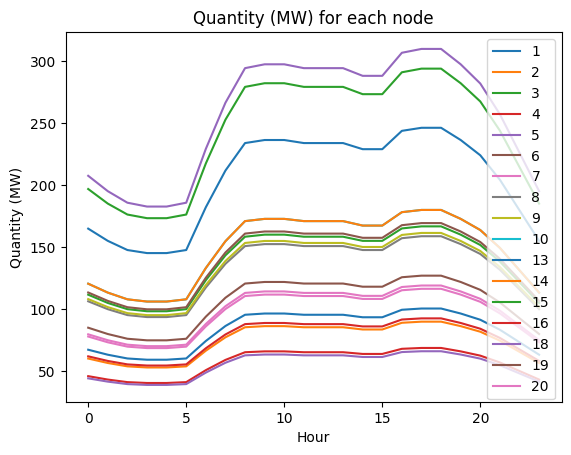

In [26]:
#plot demand prices as lines in the same plot
for i in range(0,len(node_list)):
    plt.plot(demand_dict[i]['Quantity (MW)'])
    plt.xlabel('Hour')
    plt.ylabel('Quantity (MW)')
    plt.title('Quantity (MW) for each node')
    plt.legend(node_list)
plt.show()

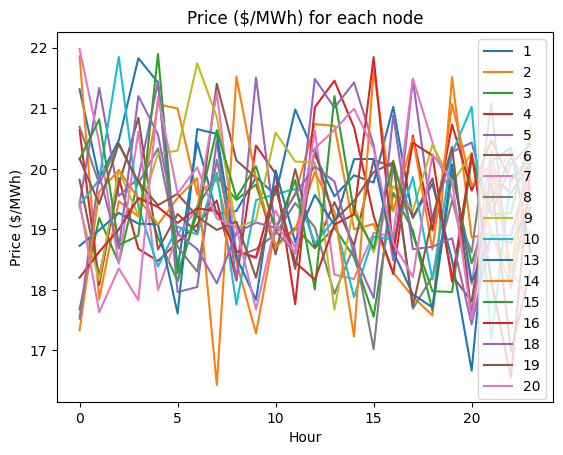

In [27]:
#plot demand prices as lines in the same plot
for i in range(0,len(node_list)):
    plt.plot(demand_dict[i]['Price ($/MWh)'])
    plt.xlabel('Hour')
    plt.ylabel('Price ($/MWh)')
    plt.title('Price ($/MWh) for each node')
    plt.legend(node_list)
plt.show()

In [28]:
#return list of demand_bids folder
import os

# Replace 'your_specific_folder_path' with the path to the folder you are interested in
folder_path = 'demand_bids'

# List all files in the specified folder
file_list = os.listdir(folder_path)


In [29]:
#create for each hour a dataframe of the bids

for hour in range(0,24):
    demand_bids = pd.DataFrame(columns=['Node', 'Quantity (MW)', 'Price ($/MWh)'])
    for bid in file_list:
        bid_df = pd.read_csv('demand_bids/'+bid)
        # Data for the new row
        new_row = {'Node': bid_df['Node'][hour], 'Quantity (MW)': bid_df['Quantity (MW)'][hour], 'Price ($/MWh)':bid_df['Price ($/MWh)'][hour]}

        # Adding a new row without using the append function
        # We're using loc to add a row at a specified index
        demand_bids.loc[len(demand_bids)] = new_row
    #save demand bids
    demand_bids.to_csv('demand_bids_hour/demand_hour_'+str(hour)+'.csv', index=False)

In [30]:
wind_profile = pd.read_csv('wind_powerprofile.csv')
# multiply all values with 200 except of hour column
wind_profile.iloc[:,1:] = wind_profile.iloc[:,1:]*200
#save data to csv
wind_profile.to_csv('wind_powerprofile_200.csv', index=False)